# Unit Tests

The following is a random collection of Asteroid programs each testing a particular aspect of Asteroid.  All the programs in this notebook should execute.  This is essentially Asteroid's test suite used for regression testing.

In [ ]:
from asteroid_interp import interp

In [92]:
program =\
'''
load "io".

-- color to hex conversion dictionary
let colors = [
    ("red", "FF,00,00"),
    ("green", "00,FF,00"),
    ("yellow", "FF,FF,00")
    ].
    
print (colors@{"red"}).
'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

FF,00,00


In [ ]:
program = \
'''
load "standard".
load "io".

constructor Person with arity 3.

let people = [
    Person("George", 32, "M"),
    Person("Sophie", 46, "F"),
    Person("Oliver", 21, "M")
    ].
    
let Person(name,age,sex) = people@1.

-- TODO: conditional expression should have higher precedence than arithmetic ops
print (name + " is " + age + " years old and is " + ("male" if sex is "M" else "female") + ".").
'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

In [ ]:
program = \
"""
load "standard".
load "io".          
let l = [("test", "testing")].
let a = l@{"test"}.
print a.
"""
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

In [ ]:
program = \
"""
load "standard".
load "io".          
let slice = [4 to 0 step -1].
print slice.
"""
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

In [ ]:
program = \
'''
load "standard".
load "io".
load "util".

let a = [1,2,3].  -- this is a list
let b = 1,2,3.    -- so is this
let c = (1,2,3).  -- and so is this
print b.
'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

In [ ]:
program = \
'''
load "standard".
load "io".
load "util".

let a = [[1,2],[3,4],[5,6]].
let l = (a@0).
print l.
'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

In [ ]:
program = \
'''
load "io".

let a = [10,20,30].
let x = a@(1).
let y = a@[1].

print x. -- prints out a scalar 
print y. -- prints out a list
'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

In [ ]:
program = \
'''
load "standard"
load "util".
load "io".

let v = random().

print v.
'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=False, do_walk=True)

In [ ]:
from asteroid_interp import interp

program = \
'''
load "standard"
load "io".
load "util".

let inc = (lambda with n do return n+1).


print (eval ('inc 1)).


'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=True)

In [ ]:
from asteroid_interp import interp

program = \
'''
load "io".
let f,g = 1,2.

function foobar 
    with () do
        global f, g.
        let f = 2.
    end function
    
foobar ().
print (f,g).


'''
interp(program, tree_dump=False, do_walk=True, exceptions=False, symtab_dump=False)

In [ ]:
from asteroid_interp import interp
program = \
'''
load "io".

try 
    let 2 = 1 + 1. 
catch _ do
    print "pattern match failed".
end try

'''
interp(program, tree_dump=False, do_walk=True, exceptions=True, symtab_dump=False)

In [ ]:
program = \
'''
load "io".

load "default". -- load default term model
let 1 + 1 = 1 + 1. -- (*@\label{patternmatching-models:let1}@*)
try 
    let 2 = 1 + 1. -- (*@\label{patternmatching-models:let1a}@*)
catch _ do
    print "pattern match failed".
end try

load "standard". -- load standard model (*@\label{patternmatching-models:load}@*)
let 2 = 1 + 1. -- (*@\label{patternmatching-models:let2}@*)
try 
    let 1 + 1 = 1 + 1. -- throws an exception (*@\label{patternmatching-models:let3}@*)
catch _ do
    print "pattern match failed".
end try

'''
interp(program, tree_dump=False, do_walk=True, exceptions=True, symtab_dump=False)

In [ ]:
from asteroid_interp import interp

program = \
'''
load "standard".
load "io".
let p = -1.
let w = p - 1.
let q = [-1].
print (p,w,q).
'''
interp(program, tree_dump=False, do_walk=True, exceptions=True, symtab_dump=False)

In [ ]:
from asteroid_interp import interp

program = \
'''
-- overload the model
load "math". -- defines mult_op
load "standard".
load "io".    
load "util".

function dot_op
    with [a],[b] do
        return mult_op(a,b).
    orwith [h1|t1],[h2|t2] do
        return mult_op(h1,h2) + dot_op(t1,t2).
    end function
    
function mult_op_overloaded
    with v1,v2 do
        if is_list(v1) and is_list(v2) do
            return dot_op(v1,v2).
        else do
            return mult_op(v1,v2).
        end if
    end function

detach from __times__.
attach  mult_op_overloaded to __times__.

print ("[2,2,2]*[2,2,2]=" + [2,2,2]*[2,2,2]).

print ("2*2=" + 2*2).
'''
interp(program, symtab_dump=False, exceptions=True)

In [ ]:
program = \
'''
-- overload the model
load "standard".
load "io".      

function dot_op
    with [],[] do
        return 0.
    orwith [h1|t1],[h2|t2] do
        return mult_op(h1,h2) + dot_op(t1,t2).
    end function
    
function mult_op_overloaded
    with [h1|t1],[h2|t2] do
        return dot_op([h1|t1],[h2|t2]).
    orwith a,b do
        return mult_op(a,b).
    end function

detach from __times__.
attach  mult_op_overloaded to __times__.

print ("Dot Product: " + [2,2,2]*[2,2,2]).
print ("Multiplication: " + 2*2).
'''
interp(program, symtab_dump=False, exceptions=False)

In [ ]:
from asteroid_interp import interp
program = \
'''
-- replace the model
load "standard".
load "io".      

function dot_op_rec
    with [], [] do
        return 0.
    orwith [h1|t1],[h2|t2] do
        return mult_op(h1,h2) + dot_op_rec(t1,t2).
    end function
    
function dot_op
    with [h1|t1],[h2|t2] do
        return dot_op_rec([h1|t1],[h2|t2]).
    end function

detach from __times__.
attach  dot_op to __times__.

let v = [2,2,2].
print (v*v).
'''
interp(program, symtab_dump=False, exceptions=False)

In [ ]:
program = \
'''
load "standard".
load "io".      

function dot_op
    with [a1,a2], [b1,b2] do 
        return mult_op(a1,b1) + mult_op(a2,b2).
end function
attach  dot_op to __times__.

let v = [2,2].
print (v*v).
'''
interp(program, symtab_dump=False, tree_dump=False)

In [ ]:
program = \
'''
load "io".

constructor S with arity 1.

function inc 
    with n do
        return 1 + n.
    end function

print (S(S(S(0)))).

attach inc to S.
print (S(S(S(0)))).
'''
interp(program,exceptions=False)

In [ ]:
program = \
'''
load "standard".
load "io".

constructor S with arity 1.

function inc 
    with n do
        return 1 + n.
    end function

-- switch between pattern- and
-- value-level programming
print (S(S(S(0)))).
attach inc to S.
print (S(S(S(0)))).
detach from S.
print (S(S(S(0)))).
'''
interp(program,exceptions=False)

In [ ]:
from asteroid_interp import interp
program = \
'''
-- implements Peano addition using a lookup table for the rewrite rules

load "standard".
load "util".
load "io".

detach from __plus__ . -- we want to use '+' as constructor
constructor S with arity 1.

let rule_table = [
    ('x + 0, 'reduce(x)),
    ('x + S(y), 'S(reduce(x + y)))
    ].

function reduce 
    with term do
        for i in 0 to length(rule_table) - 1 do
            -- limit visibility of free variables of the rewrite rules
            -- to the with block scope
            let lhs, rhs = rule_table@i.
            if term is *lhs do
                return eval rhs.
            end if
        end for
        return term.
    end function

print (reduce(S(S(0)) + S(S(S(0))))).
'''

interp(program,exceptions=False)

In [ ]:
program = \
'''
-- implements Peano addition using a lookup table for the rewrite rules

load "standard".
load "util".
load "io".

detach from __plus__ . -- we want to use '+' as constructor
constructor S with arity 1.

let rule_table = [
    ('x + 0, 'reduce(x)),
    ('x + S(y), 'S(reduce(x + y)))
    ].

function reduce 
    with term do
        for i in 0 to length(rule_table) - 1 do
            let (lhs, rhs) = rule_table@i.
            if term is *lhs do
                return eval(rhs).
            end if
        end for
        return term.
    end function

print (reduce('S(S(0)) + S(S(S(0))))).
'''

interp(program,exceptions=True)

In [ ]:
program = \
'''
load "io".

let cl = 1 + 2.
let cr = 3.
let pattern = cl + cr.

print (1+2+3 is *pattern).
'''
interp(program, tree_dump=False, exceptions=False)

In [ ]:
program = \
'''
load "io".

function match
    with subject, pattern do
        return subject is *pattern.
    end function
    
print (match(1+1, '_+_)).
'''
interp(program, tree_dump=False, exceptions=False)

In [1]:
from asteroid_interp import interp
program = \
'''
load "standard".
load "io".
load "util".

constructor Dog with arity 3.

-- assemble the prototype object
let dog_proto = Dog (
  ("name", ""),
  ("tricks", []),
  ("add_trick", 
     lambda 
       with (self,new_trick) do 
         let self@{"tricks"} = 
           self@{"tricks"}+[new_trick])).

-- Fido the dog
let fido = copy dog_proto.
let fido@{"name"} = "Fido".

fido@{"add_trick"} "roll over".
fido@{"add_trick"} "play dead".

-- Buddy the dog
let buddy = copy dog_proto.
let buddy@{"name"} = "Buddy".

buddy@{"add_trick"} "roll over".
buddy@{"add_trick"} "sit stay".

-- Fifi the dog
let fifi = copy dog_proto.
let fifi@{"name"} = "Fifi".

fifi@{"add_trick"} "sit stay".

-- print out all the names of dogs 
-- whose first trick is 'roll over'.
let dogs = [fido, buddy, fifi].

let dog = Dog(("name",'name),
               ("tricks",'["roll over"|_]),
               '_).

for *dog in dogs do
  print (name + " does roll over").
end for
'''
interp(program)

Fido does roll over
Buddy does roll over


In [2]:
program = \
'''
load "standard".
load "io".
load "util".

constructor Dog with arity 3.

-- assemble the prototype object
let dog_proto = Dog (
  ("name", ""),
  ("tricks", []),
  ("add_trick", 
     lambda 
       with (self,new_trick) do 
         let self@{"tricks"} = 
           self@{"tricks"}+[new_trick])).

-- Fido the dog
let fido = copy dog_proto.
let fido@{"name"} = "Fido".

fido@{"add_trick"} "roll over".
fido@{"add_trick"} "play dead".

-- Buddy the dog
let buddy = copy dog_proto.
let buddy@{"name"} = "Buddy".

buddy@{"add_trick"} "roll over".
buddy@{"add_trick"} "sit stay".

-- Fifi the dog
let fifi = copy dog_proto.
let fifi@{"name"} = "Fifi".

fifi@{"add_trick"} "sit stay".

-- print out all the names of dogs 
-- whose first trick is 'roll over'.
let dogs = [fido, buddy, fifi].

for Dog(("name",name),
        ("tricks",["roll over"|_]),
        _) in dogs do
  print (name + " does roll over").
end for
'''
interp(program)

Fido does roll over
Buddy does roll over


In [3]:
program = \
'''
load "standard".
load "io".
load "util".

constructor Dog with arity 3.

-- assemble the prototype object
let dog_proto = Dog (
  ("name", ""),
  ("tricks", []),
  ("add_trick", 
     lambda 
       with (self,new_trick) do 
         let self@{"tricks"} = 
           self@{"tricks"}+[new_trick])).

-- Fido the dog
let fido = copy dog_proto.
let fido@{"name"} = "Fido".

fido@{"add_trick"}("roll over").
fido@{"add_trick"} "play dead".

-- Buddy the dog
let buddy = copy dog_proto.
let buddy@{"name"} = "Buddy".

buddy@{"add_trick"} "roll over".
buddy@{"add_trick"} "sit stay".

-- print out the tricks
print ("Fido: " + fido@{"tricks"}).
print ("Buddy: " + buddy@{"tricks"}).
'''
interp(program)

Fido: [roll over,play dead]
Buddy: [roll over,sit stay]


In [4]:
program = \
'''
load "io".

constructor MyException with arity 1.

try
    throw MyException("Hello There!").
catch MyException(v) do
    print v.
end try
'''
interp(program, tree_dump=False, exceptions=False)

Hello There!


In [5]:
program = \
'''
load "io".
load "standard".

try
    let i = 10/0.
    print i.
catch e do
    print e.
end try
'''
interp(program, tree_dump=False, exceptions=False)

[Exception,integer division or modulo by zero]


In [6]:
program = \
'''
load "io".
load "standard".

try
    let i = 10/0.
    print i.
catch ("Exception", v) do
    print v.
end try
'''
interp(program, tree_dump=False, exceptions=False)

integer division or modulo by zero


In [7]:
program = \
'''
load "standard".
load "io".
load "util".

constructor Person with arity 3.

let people = [
    Person("George", 32, "M"),
    Person("Sophie", 46, "F"),
    Person("Oliver", 21, "M")
    ].
    
let n = length people.
let sum = 0.

for Person(_,age,_) in people do
    let sum = sum + age.
end for

print ("Average Age: " + (sum/n)).

for Person(name,_,"M") in people do
    print name.
end for
'''
interp(program, tree_dump=False, exceptions=False)

Average Age: 33
George
Oliver


In [8]:
program = \
'''
load "standard".
load "io".
load "util".

constructor Person with arity 2.

let people = [
    Person("George", 32),
    Person("Sophie", 46),
    Person("Oliver", 21)
    ].
    
let n = length people.
let sum = 0.

for Person(_,age) in people do
    let sum = sum + age.
end for

print ("Average Age: " + (sum/n)).
'''
interp(program, tree_dump=False, exceptions=False)

Average Age: 33


In [9]:
program = \
'''
load "io".

constructor Person with arity 3.

let people = [
    Person("George", 32, "M"),
    Person("Sophie", 46, "F"),
    Person("Oliver", 21, "M")
    ].
    
for Person(name,_,"M") in people do
    print name.
end for
'''
interp(program, tree_dump=False, exceptions=False)

George
Oliver


In [10]:
program = \
'''
load "io".

let list = [1,2,3].

repeat do
    let [head|list] = list.
    print head.
until list is [_].
'''
interp(program, tree_dump=False, exceptions=False)

1
2


In [11]:
program = \
'''
load "io".

let true = 1 + 2 is x + y.
print (x,y).
'''
interp(program, tree_dump=False, exceptions=False)

[1,2]


In [12]:
program = \
'''
constructor S with arity 1.

let v = S(S(S(0))).

'''
interp(program, tree_dump=True, exceptions=False)


(list 
  |[ 
  |  |(lineinfo 
  |  |  |(<input> 1)) 
  |  |(unify 
  |  |  |(id S) 
  |  |  |(constructor 
  |  |  |  |(arity 1))) 
  |  |(lineinfo 
  |  |  |(<input> 3)) 
  |  |(unify 
  |  |  |(id v) 
  |  |  |(apply-list 
  |  |  |  |(list 
  |  |  |  |  |[ 
  |  |  |  |  |  |(id S) 
  |  |  |  |  |  |(apply-list 
  |  |  |  |  |  |  |(list 
  |  |  |  |  |  |  |  |[ 
  |  |  |  |  |  |  |  |  |(id S) 
  |  |  |  |  |  |  |  |  |(apply-list 
  |  |  |  |  |  |  |  |  |  |(list 
  |  |  |  |  |  |  |  |  |  |  |[ 
  |  |  |  |  |  |  |  |  |  |  |  |(id S) 
  |  |  |  |  |  |  |  |  |  |  |  |(integer 0)]))]))])))])


In [13]:
program = \
'''
-- implements Peano addition on terms
load "io".

constructor S with arity 1.

function reduce
    with x + 0 do      
        return reduce(x).
    orwith x + S(y)  do
        return S(reduce(x + y)).
    orwith term do     
        return term.
    end function

print(reduce(S(S(0)) + S(S(S(0))) + S(0) + S(0))).
'''
interp(program, tree_dump=False, exceptions=False)

S(S(S(S(S(S(S(0)))))))


In [14]:
program = \
'''
-- implements Peano addition on terms using pattern matching in if statements
load "io".

constructor S with arity 1.

function reduce 
    with term do
        if term is x + 0 do      
            return reduce(x).
        elif term is x + S(y)  do
            return S(reduce(x + y)).
        else     
            return term.
        end if
    end function

print(reduce(S(S(0)) + S(S(S(0))) + S(0) + S(0))).
'''
interp(program, tree_dump=False, exceptions=False)

S(S(S(S(S(S(S(0)))))))


In [15]:
from asteroid_interp import interp
program = \
'''
-- Quicksort

load "standard".
load "io".

function qsort
    with [] do
        return [].
    orwith [a] do
        return [a].
    orwith [pivot|rest] do
        let less=[].
        let more=[].
            
        for e in rest do  
            if e < pivot do
                let less = less + [e].
            else
                let more = more + [e].
            end if
        end for
                     
        return qsort less + [pivot] + qsort more.
    end function
    
print (qsort [3,2,1,0])
'''

interp(program, symtab_dump=False)

[0,1,2,3]


In [16]:
program = \
'''
load "standard".
load "io".
load "util".

let 1 + 1 = '1 + 1. -- quoted expression
let 2 = eval('1 + 1).
let 2 = 1 + 1.
try
    let 1 + 1 = 1 + 1.
catch ("PatternMatchFailed", v) do
    print v.
end try

'''
interp(program, tree_dump=False, do_walk=True, exceptions=False, symtab_dump=False)

pattern match failed: term and pattern disagree on 'apply-list' node


In [17]:
program = \
'''
load "standard".
load "io".      

function dot_op
    with [a1,a2], [b1,b2] do 
        return mult_op(a1,b1) + mult_op(a2,b2).
end function
attach  dot_op to __times__.

print ([2,2] * [2,2])
'''
interp(program, symtab_dump=False)

8


In [18]:
program = \
'''
load "standard".
load "io".      

attach (lambda with a, b do return a * b) to __plus__.
print (3 + 2).  
detach from __plus__.
print (3 + 2).  
'''
interp(program, symtab_dump=False)

6
5


In [19]:
program = \
'''
load "io".

function postfix
    with (op, cl, cr) do 
        return (postfix cl, postfix cr, op)
    orwith (op, c) do 
        return (postfix c, op)
    orwith (v,) do 
        return (v,)
end function

print (postfix ("+", (1,), (2,))).

    
'''
interp(program, tree_dump=False, do_walk=True, exceptions=True, symtab_dump=False)

[[1],[2],+]


In [20]:
program = \
'''
load "io". -- load io module

-- print out the value using the default term model
print (4 + 3 - 2).

-- load the standard model and print out value of the term
load "standard".
print (4 + 3 - 2).

-- manipulate the standard model, switching the interpretations
-- of plus and minus.

-- save the interpretations
let plus_op = __plus__.
let minus_op = __minus__.

-- detach the interpretations from constructors
detach from __plus__.
detach from __minus__.

-- reattach in opposite order and print the value of the term
attach plus_op to __minus__.
attach minus_op to __plus__.

print (4 + 3 - 2).

'''
interp(program, tree_dump=False, do_walk=True, exceptions=False, symtab_dump=False)

__minus__([__plus__([4,3]),2])
5
3


In [21]:
program = \
'''
-- to see the effect of detach all comment out the second line and look at the symbol table. 
load "standard".
load "default".
'''
interp(program, tree_dump=False, do_walk=True, exceptions=False, symtab_dump=True)

*** Symbol Table Dump:
[{'__and__': [('constructor', ('arity', 2))],
  '__divide__': [('constructor', ('arity', 2))],
  '__eq__': [('constructor', ('arity', 2))],
  '__ge__': [('constructor', ('arity', 2))],
  '__gt__': [('constructor', ('arity', 2))],
  '__le__': [('constructor', ('arity', 2))],
  '__lt__': [('constructor', ('arity', 2))],
  '__minus__': [('constructor', ('arity', 2))],
  '__ne__': [('constructor', ('arity', 2))],
  '__not__': [('constructor', ('arity', 1))],
  '__or__': [('constructor', ('arity', 2))],
  '__plus__': [('constructor', ('arity', 2))],
  '__times__': [('constructor', ('arity', 2))],
  '__uminus__': [('constructor', ('arity', 1))],
  'add_op': [('function',
              ('body-list',
               ('list',
                [('body',
                  ('pattern', ('raw-list', [('id', 'a'), ('id', 'b')])),
                  ('stmt-list',
                   ('list',
                    [('lineinfo', ('math', 26)),
                     ('return',
           

In [22]:
program = \
'''
load "io".

try
    detach from __plus__.
catch ("Exception", v) do
    print v.
end try
'''
interp(program, tree_dump=False, do_walk=True, exceptions=True)

Cannot detach constructor from __plus__.


In [23]:
program = \
'''
load "io".

try
    let 2 = 1 + 1.
catch ("PatternMatchFailed", v) do
    print v.
end try
'''
interp(program, tree_dump=False, do_walk=True, exceptions=False)

pattern match failed: nodes 'apply-list' and 'integer' are not the same


In [24]:
program = \
'''
load "io".

let 1 + 1 = 1 + 1.
load "standard". -- load standard model
let 2 = 1 + 1.
try
    let 1 + 1 = 1 + 1.
catch _ do
    print "not a legal unification under the standard model".
end try
'''
interp(program, tree_dump=False, do_walk=True)

not a legal unification under the standard model


In [25]:
program =\
'''
-- another OO example
load "standard".
load "io".

-- Our Dog type constructor
constructor Dog with arity 3.

-- the prototype object
let fido = Dog 
        (
            ("name", "Fido"),
            ("trick", "play dead"),
            ("make_string", 
                lambda with self,v,w do return self@{"name"} + " does " + v + w + self@{"trick"})
        ).

-- Fido the dog
print (fido@{"make_string"} (2,3)).
'''

interp(program, tree_dump=False, do_walk=True)

Fido does 23play dead


In [26]:
program =\
'''
load "util".
load "io".

let cnt = integer(input("Please enter an integer value: ")).

for i in 1 to cnt do
    print i.
end for
'''

interp(program)

Please enter an integer value: 5
1
2
3
4
5


In [27]:
from asteroid_interp import interp

program =\
'''
load "standard".
load "io".

let name = input("Please enter your name: ").
print("Hello " + name + "!").
'''

interp(program)

Please enter your name: Fred
Hello Fred!


In [28]:
program = \
'''
load "util".
load "io".

constructor S with arity 1.

let x = 'S(S(0)).
let y = 'S(S(x)).
let z = y.

print y.
print z.
print (eval (z)).
'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=True)

S(S(x))
S(S(x))
S(S(S(S(0))))


In [29]:
program = \
'''
constructor S with arity 1.

let y = S S  S S 0.

'''
interp(program, tree_dump=False, symtab_dump=True, do_walk=True, exceptions=True)

*** Symbol Table Dump:
[{'S': [('constructor', ('arity', 1))],
  '__and__': [('constructor', ('arity', 2))],
  '__divide__': [('constructor', ('arity', 2))],
  '__eq__': [('constructor', ('arity', 2))],
  '__ge__': [('constructor', ('arity', 2))],
  '__gt__': [('constructor', ('arity', 2))],
  '__le__': [('constructor', ('arity', 2))],
  '__lt__': [('constructor', ('arity', 2))],
  '__minus__': [('constructor', ('arity', 2))],
  '__ne__': [('constructor', ('arity', 2))],
  '__not__': [('constructor', ('arity', 1))],
  '__or__': [('constructor', ('arity', 2))],
  '__plus__': [('constructor', ('arity', 2))],
  '__times__': [('constructor', ('arity', 2))],
  '__uminus__': [('constructor', ('arity', 1))],
  'y': [('apply-list',
         ('list',
          [('id', 'S'),
           ('apply-list',
            ('list',
             [('id', 'S'),
              ('apply-list',
               ('list',
                [('id', 'S'),
                 ('apply-list',
                  ('list', [('id', 

In [30]:
program = \
'''
load "io".

function ident 
    with n do 
        return n 
    end function 

let y = ident ident  0.

print y.

'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=True)

0


In [31]:
program = \
'''
load "io".

function ident 
    with n do 
        return n 
    end function 

let y = ident(ident (0)).
let x = ident ident 0.

print (x,y).

'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=True)

[0,0]


In [32]:
program = \
'''
-- Factorial

load "standard".
load "io".

function fact 
    with 0 do
        return 1
    orwith n do
        return n * fact (n-1).
    end function

print ("The factorial of 3 is: " + fact (3)).
'''

interp(program, exceptions=False, symtab_dump=False)

The factorial of 3 is: 6


In [33]:
program = \
'''
-- show that the value constructed by head-tail is a list
let [1,2,3] = 1 | [2,3].

-- show that a list can be decomposed with head-tail
let 1 | [2,3] = [1,2,3].

-- show that we can nest head-tail operators
let [1,2,3] = 1 | 2 | 3 | [].

'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=False)

In [34]:
program = \
'''
load "standard".
load "util".
load "io".

constructor MyError with arity 1.


try

    throw Error "--- error ---".
    
catch Error(msg) do
    print msg.

end try

'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=False)

--- error ---


In [35]:
program = \
'''
load "standard".
load "io".

let h|t = [1,2,3].
print ("head: " + h + " tail: " + t).
'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=False)

head: 1 tail: [2,3]


In [36]:
program = \
'''
load "standard".
load "io".

let y = -1.
let x = 4 if y == 3 else 0.
print x.

'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=False)

0


In [37]:
program = \
'''
load "io".

let y = none.
let x = y otherwise 1.
print x.

'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=False)

1


In [38]:
program = \
'''
load "standard".
load "io".

for x in 0 to 10 do
    print x.
    if x == 5 do
        break.
    end if
end for
'''
interp(program, tree_dump=False, do_walk=True, exceptions=False)

0
1
2
3
4
5


In [39]:
program = \
'''
load "io".

for (x,y) in [(1,1), (2,2), (3,3)]  do
    print (x,y).
end for

-- use unification as a filter
for (2,y) in [(1,11), (1,12), (1,13), (2,21), (2,22), (2,23)]  do
    print y.
end for
'''
interp(program, tree_dump=False, do_walk=True, symtab_dump=False)

[1,1]
[2,2]
[3,3]
21
22
23


In [40]:
program = \
'''
load "io".

for x in 1 to 10 do
    print x.
end for
'''
interp(program, tree_dump=False, do_walk=True, symtab_dump=False)

1
2
3
4
5
6
7
8
9
10


In [41]:
program = \
'''
load "io".

for bird in ["turkey","duck","chicken"] do
    print bird.
end for
'''
interp(program, tree_dump=False, do_walk=True, symtab_dump=False)

turkey
duck
chicken


In [42]:
program = \
'''
load "standard".
load "io".

let x = 42.

if x < 0 do
    let x = 0.
    print("Negative changed to zero").

elif x == 0 do
    print("Zero").

elif x == 1 do
    print("Single").

else do
    print("More").
    
end if

'''
interp(program, tree_dump=False, do_walk=True, exceptions=False)

More


In [43]:
program = \
'''
load "standard".
load "io".

let x = 1.
while x <= 10 do
    print x.
    let x = x + 1.
end while
'''
interp(program, exceptions=True)

1
2
3
4
5
6
7
8
9
10


In [44]:
program = \
'''
let 1 = 1.
'''
interp(program, exceptions=True, tree_dump=True)


(list 
  |[ 
  |  |(lineinfo 
  |  |  |(<input> 1)) 
  |  |(unify 
  |  |  |(integer 1) 
  |  |  |(integer 1))])


In [45]:
program = \
'''
load "standard".

'''
interp(program, tree_dump=False, symtab_dump=False)

In [46]:
from asteroid_interp import interp
program = \
'''
load "io".

constructor A with arity 2.

let a = A("Hello", (lambda with self do return self@0)).
print (a@1 none).

a@1 ().

'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=True, do_walk=True)

Hello


In [47]:
program = \
'''
load "io".

constructor A with arity 2.

let a = A("Hello", (lambda with self do print self@0)).
a@1 none.
'''
interp(program, tree_dump=False, symtab_dump=False, exceptions=False)

Hello


In [48]:
program = \
'''
load "io".

print (1,2,3).
'''
interp(program)

[1,2,3]


In [49]:
program = \
'''
let nl = [[1 to 10],].
'''
interp(program, tree_dump=False, symtab_dump=False)

In [50]:
program = \
'''
-- Not yet implemented
-- let l = [2*i where i in [1 to 100]].
'''
interp(program, symtab_dump=False, tree_dump=False, exceptions=False)

In [51]:
program = \
'''
load "io".
try 
    let [1 to 3] = [1,2,3].
catch _, v do
    print v.
end try

let [1,2,3] = [1 to 3].
'''
interp(program, symtab_dump=False, tree_dump=False, exceptions=True)

pattern match failed: pattern of type 'to-list' not allowed in pattern matching


In [52]:
program = \
'''
load "io".
constructor A with arity 3.

let a = A(1,2,3).
let b = a@[0 to 2].
print b.
'''
interp(program, symtab_dump=False, tree_dump=False, exceptions=True)

[1,2,3]


In [53]:
program = \
'''
load "io".
let a = [0,1,2,3].
let b = a@[0 to 3 step 2].
print b.
'''
interp(program, symtab_dump=False, tree_dump=False, exceptions=True)

[0,2]


In [54]:
program = \
'''
load "io".
let y = [0 to 10 step 2].
let z = 4 in y.
print z.
'''
interp(program, symtab_dump=False, tree_dump=False)

true


In [55]:
in_test = \
'''
let y = 3 in [1,2,3].
'''
interp(in_test, symtab_dump=False)

In [56]:
is_test = \
'''
let y = (1,2) is (1,x).
let z = (1,3) is (1,x).

'''
interp(is_test, symtab_dump=False)

In [57]:
constr_dict_store =\
'''
constructor A with arity 2.

let foo = A(("a",1),("b",2)).
let foo@{"a"} = 2.

'''
interp(constr_dict_store, tree_dump=True, exceptions=True, symtab_dump=True)


(list 
  |[ 
  |  |(lineinfo 
  |  |  |(<input> 1)) 
  |  |(unify 
  |  |  |(id A) 
  |  |  |(constructor 
  |  |  |  |(arity 2))) 
  |  |(lineinfo 
  |  |  |(<input> 3)) 
  |  |(unify 
  |  |  |(id foo) 
  |  |  |(apply-list 
  |  |  |  |(list 
  |  |  |  |  |[ 
  |  |  |  |  |  |(id A) 
  |  |  |  |  |  |(list 
  |  |  |  |  |  |  |[ 
  |  |  |  |  |  |  |  |(list 
  |  |  |  |  |  |  |  |  |[ 
  |  |  |  |  |  |  |  |  |  |(string a) 
  |  |  |  |  |  |  |  |  |  |(integer 1)]) 
  |  |  |  |  |  |  |  |(list 
  |  |  |  |  |  |  |  |  |[ 
  |  |  |  |  |  |  |  |  |  |(string b) 
  |  |  |  |  |  |  |  |  |  |(integer 2)])])]))) 
  |  |(lineinfo 
  |  |  |(<input> 4)) 
  |  |(unify 
  |  |  |(structure-ix 
  |  |  |  |(id foo) 
  |  |  |  |(index-list 
  |  |  |  |  |(list 
  |  |  |  |  |  |[ 
  |  |  |  |  |  |  |(index 
  |  |  |  |  |  |  |  |(dict-access 
  |  |  |  |  |  |  |  |  |(string a)))]))) 
  |  |  |(integer 2))])
*** Symbol Table Dump:
[{'A': [('constructor', ('arity

In [58]:
store_dict = \
'''
let d = [("a", 100)].
let d@{"foo"} = 1.
let d@{"goo"} = 2.

let d@{"foo"} = 2.

'''
interp(store_dict, tree_dump=False, symtab_dump=True, exceptions=False)

*** Symbol Table Dump:
[{'__and__': [('constructor', ('arity', 2))],
  '__divide__': [('constructor', ('arity', 2))],
  '__eq__': [('constructor', ('arity', 2))],
  '__ge__': [('constructor', ('arity', 2))],
  '__gt__': [('constructor', ('arity', 2))],
  '__le__': [('constructor', ('arity', 2))],
  '__lt__': [('constructor', ('arity', 2))],
  '__minus__': [('constructor', ('arity', 2))],
  '__ne__': [('constructor', ('arity', 2))],
  '__not__': [('constructor', ('arity', 1))],
  '__or__': [('constructor', ('arity', 2))],
  '__plus__': [('constructor', ('arity', 2))],
  '__times__': [('constructor', ('arity', 2))],
  '__uminus__': [('constructor', ('arity', 1))],
  'd': [('list',
         [('list', [('string', 'a'), ('integer', 100)]),
          ('list', [('string', 'foo'), ('integer', 2)]),
          ('list', [('string', 'goo'), ('integer', 2)])])]}]
*** Globals Table:
[[]]
*** Global Scope:
{'__and__': [('constructor', ('arity', 2))],
 '__divide__': [('constructor', ('arity', 2))],
 '

In [59]:
store_list = \
'''
load "io".

let b = [[1,2,3],
         [4,5,6],
         [7,8,9]].
let b@1@1 = 0.
print b.
'''
interp(store_list, tree_dump=False, exceptions=True)

[[1,2,3],[4,0,6],[7,8,9]]


In [60]:
constr_dict =\
'''
load "io".

constructor A with arity 2.

let foo = A(("a",1),("b",2)).
print (foo@{"a"}).

let goo = A([(1,1),(2,2)]).
print (goo@{1}).


'''
interp(constr_dict, tree_dump=False, exceptions=True)

1
1


In [61]:
dict = \
'''
load "io".

let d = [("a", 1)].

print (d@{"a"}).
'''
interp(dict, tree_dump=False)

1


In [62]:
list_equiv = \
'''
-- some list equivalencies

let [0] = 0, .
let [0,1,2] = 0,1,2.
let [[0,1,2]] = ((0,1,2),).
let (0,1,2),(3,4,5) = ((0,1,2),(3,4,5)).
'''
interp(list_equiv, tree_dump=False)

In [63]:
unary_ops = \
'''
let x = -1.
let y = not true.
'''
interp(unary_ops, tree_dump=False, symtab_dump=True)

*** Symbol Table Dump:
[{'__and__': [('constructor', ('arity', 2))],
  '__divide__': [('constructor', ('arity', 2))],
  '__eq__': [('constructor', ('arity', 2))],
  '__ge__': [('constructor', ('arity', 2))],
  '__gt__': [('constructor', ('arity', 2))],
  '__le__': [('constructor', ('arity', 2))],
  '__lt__': [('constructor', ('arity', 2))],
  '__minus__': [('constructor', ('arity', 2))],
  '__ne__': [('constructor', ('arity', 2))],
  '__not__': [('constructor', ('arity', 1))],
  '__or__': [('constructor', ('arity', 2))],
  '__plus__': [('constructor', ('arity', 2))],
  '__times__': [('constructor', ('arity', 2))],
  '__uminus__': [('constructor', ('arity', 1))],
  'x': [('apply-list', ('list', [('id', '__uminus__'), ('integer', 1)]))],
  'y': [('apply-list', ('list', [('id', '__not__'), ('boolean', True)]))]}]
*** Globals Table:
[[]]
*** Global Scope:
{'__and__': [('constructor', ('arity', 2))],
 '__divide__': [('constructor', ('arity', 2))],
 '__eq__': [('constructor', ('arity', 2))],

In [64]:
apply = \
'''
-- infix operators are just a shorthand for prefix terms 
-- using special names for the operators

load "standard".

let x = __plus__ (1,1).
let y = 1 + 1.

let 1 + 1 = '__plus__ (1,1).
'''
interp(apply, tree_dump=False, symtab_dump=True)

*** Symbol Table Dump:
[{'__and__': [('function',
               ('body-list',
                ('list',
                 [('body',
                   ('pattern', ('raw-list', [('id', 'a'), ('id', 'b')])),
                   ('stmt-list',
                    ('list',
                     [('lineinfo', ('math', 125)),
                      ('return',
                       ('escape',
                        '\n'
                        'global __retval__ \n'
                        'from asteroid_support import map2boolean\n'
                        'from asteroid_state import state\n'
                        '\n'
                        'b1 = '
                        "map2boolean(state.symbol_table.lookup_sym('a')) \n"
                        'b2 = '
                        "map2boolean(state.symbol_table.lookup_sym('b')) \n"
                        '\n'
                        'if b1[1] == True and b2[1] == True:\n'
                        "   __retval__ = ('boolean', True)\n"
       

               [('body',
                 ('pattern', ('raw-list', [('id', 'a'), ('id', 'b')])),
                 ('stmt-list',
                  ('list',
                   [('lineinfo', ('math', 279)),
                    ('return',
                     ('escape',
                      '\n'
                      'global __retval__ \n'
                      'from asteroid_support import promote\n'
                      'from asteroid_state import state\n'
                      '\n'
                      "val_a = state.symbol_table.lookup_sym('a')\n"
                      "val_b = state.symbol_table.lookup_sym('b')\n"
                      '\n'
                      '\n'
                      'type = promote(val_a[0], val_b[0])\n'
                      '\n'
                      '\n'
                      "if type in ['integer', 'real']:\n"
                      "    __retval__ = ('boolean', val_a[1] > val_b[1])\n"
                      '\n'
                      'else:\n'
            

                     "val_b = state.symbol_table.lookup_sym('b')\n"
                     '\n'
                     'type = promote(val_a[0], val_b[0])\n'
                     '\n'
                     "if type in ['integer', 'real']:\n"
                     "    __retval__ = ('boolean', val_a[1] <= val_b[1])\n"
                     '\n'
                     'else:\n'
                     "    raise ValueError('unsupported type in "
                     "<=')\n"))])))])))],
 'lt_op': [('function',
            ('body-list',
             ('list',
              [('body',
                ('pattern', ('raw-list', [('id', 'a'), ('id', 'b')])),
                ('stmt-list',
                 ('list',
                  [('lineinfo', ('math', 235)),
                   ('return',
                    ('escape',
                     '\n'
                     'global __retval__ \n'
                     'from asteroid_support import promote\n'
                     'from asteroid_state import state\n'


In [65]:
constr_lval = \
'''
load "io".
constructor A with arity 1.
let A(0,) = A[0].  -- BUT A(0) != A[0] --> needs to be straightened out...
let a = A[0].
let a@0 = 1.
print a.
print a@0.
'''
interp(constr_lval, tree_dump=False, symtab_dump=False, exceptions=False)

A([1])
1


In [66]:
constr_lval2 = \
'''
load "io".
constructor A with arity 3.
let a = A[1,2,3].
let a@1 = 0.
print a.
'''
interp(constr_lval2, tree_dump=False, symtab_dump=False, exceptions=False)

A([1,0,3])


In [67]:
from asteroid_interp import interp

In [68]:
program = \
'''
load "io".
load "standard".
let [h|t] = [1,2,3].
print ("head: " + h + " tail: " + t)
'''
interp(program, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=True)

head: 1 tail: [2,3]


In [69]:
from asteroid_interp import interp
array_lval = \
'''
load "io".

let a = [1,2,3].
let b = [0,0,0].
let b@2,b@1,b@0 = a.
print b
'''
interp(array_lval, tree_dump=False, symtab_dump=False, do_walk=True, exceptions=True)

[3,2,1]


In [70]:
from asteroid_interp import interp


struct = \
'''
load "io".
constructor A with arity 1.
constructor B with arity 2.

let x = A(1,).
let y = B(1,2).

let A(z,) = x.
let B(v,w) = y.

let xx = x@0.
let yy = y@[0,1].

print (x,y,xx,yy).
'''
interp(struct, tree_dump=False, symtab_dump=False, exceptions=False)

[A([1]),B([1,2]),1,[1,2]]


In [71]:
arr = \
'''
load "io".

let v = 'a@[3].
raw_print v.
'''
interp(arr)

('quote',
 ('structure-ix',
  ('id', 'a'),
  ('index-list', ('list', [('index', ('list', [('integer', 3)]))]))))


In [72]:
func = \
'''
load "standard".
load "io".

function inc with n do return n+1 end function

let v = inc(inc(0)).
let q = 1 + 1 + 1.
print (v, q).
'''
interp(func, tree_dump=False, symtab_dump=False)

[2,3]


In [73]:
constr = \
'''
-- constructors and pattern matching

load "standard".
load "io".

constructor S with arity 1.
attach (lambda with n do return 1+n) to S.

let v = 'S(S(0)).
print v.

let v = S(S(0)).
print v.

let S (S (v))  = 'S(S(0)).
print v.

let S (S (0))  = 'S(S(0)).


let [[v]] = [[0]].
print v.

'''
interp(constr, tree_dump=False, symtab_dump=False, exceptions=False)

S(S(0))
2
0
0


In [74]:
string_conc = \
'''
-- show off our overloaded '+' operator
load "standard".
load "io".

print (1 + 1).

let s1 = "hello".
let s2 = "world".
let s3 = s1 + " " + s2 +"!".
print s3.

let l1 = [1,2,3].
let l2 = [4,5,6].
let l3 = l1 + l2.
print l3
'''
interp(string_conc, tree_dump=False, symtab_dump=False, exceptions=False)

2
hello world!
[1,2,3,4,5,6]


In [75]:
from asteroid_interp import interp


array_rval = \
'''
load "io".

-- reverse the list
let a = [1,2,3].
let a = a@[2,1,0].
print a.

'''
interp(array_rval, tree_dump=False, do_walk=True, symtab_dump=False, exceptions=True)

[3,2,1]


In [76]:
from asteroid_interp import interp


array_rval = \
'''
load "io".

-- reverse the list
let a = [1,2,3].
let a = a@[2,1,0].
print a.

-- access multidim array
let b = [[1,2,3],
         [4,5,6],
         [7,8,9]].
let e = b@1@1.
print e.
'''
interp(array_rval, tree_dump=False, do_walk=True, symtab_dump=False, exceptions=True)

[3,2,1]
5


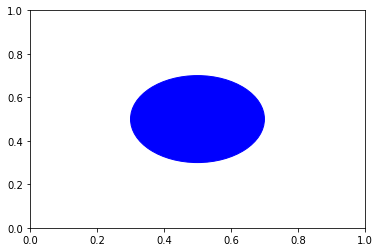

In [78]:
graphics = \
'''
-- Asteroid graphics
-- we can incorporate Python graphics into Asteroid via
-- escaped Python code

function circle with x, y, r do escape
"
#########################################################
vx = float(state.symbol_table.lookup_sym('x')[1])
vy = float(state.symbol_table.lookup_sym('y')[1])
vr = float(state.symbol_table.lookup_sym('r')[1])

import matplotlib.pyplot as plt

circle = plt.Circle((vx, vy), vr, color='blue')
fig, ax = plt.subplots()
ax.add_artist(circle)
plt.show()
#########################################################
"
end function

-- call the escaped function
circle(.5, .5, .2)
'''
interp(graphics, exceptions=False, tree_dump=False, symtab_dump=False, do_walk=True)

In [79]:
attach = \
'''
-- the 'add' function implements the behavior for 
-- the '+' operator for ints, reals, and strings.

load "io".

function add with a, b do return escape 
"
###################################################################
# return register from 'escape' calls
global __retval__ 
from asteroid_support import promote

# 'promote' is the type promotion table for primitive
# builtin types which implement the type hierarchy:
#    integer < real < string
type = promote(state.symbol_table.lookup_sym('a')[0], 
               state.symbol_table.lookup_sym('b')[0])

# select the correct add according to type
if type == 'integer':
    __retval__ = ('integer', 
            int(state.symbol_table.lookup_sym('a')[1]) + 
            int(state.symbol_table.lookup_sym('b')[1]))

elif type == 'real':
    __retval__ = ('real', 
            float(state.symbol_table.lookup_sym('a')[1]) + 
            float(state.symbol_table.lookup_sym('b')[1]))

elif type == 'string':
    __retval__ = ('string', 
            str(state.symbol_table.lookup_sym('a')[1])+
            str(state.symbol_table.lookup_sym('b')[1]))

else:
    raise ValueError('unsupported type in add')
###################################################################
"     
end function

-- attach the behavior to the '+' constructor
attach add to __plus__.

-- test the '+' operator with different data types
let x = 1.2 + 2 .
print x.
print ("the output is: " + x).
-- print [1,2] + 3.
'''
interp(attach, tree_dump=False, symtab_dump=False, exceptions=False)

3.2
the output is: 3.2


In [80]:
from asteroid_interp import interp

In [81]:
interp('load "io".let x + y = 1 + 2. print (x,y).')

[1,2]


In [82]:

interp('load "io".let x = 1 + 2. print x.')

__plus__([1,2])


In [83]:
interp('load "io".let x = 1.3 . print x.', exceptions=True)

1.3


In [84]:
program =\
'''
load "io".

try
    let 1 = 1.0 .
catch _,v do
    print v.
end try
'''

interp(program)

pattern match failed: nodes 'real' and 'integer' are not the same


In [85]:
interp('load "io".let 1,y = 1,2. print (1,y).')

[1,2]


In [86]:
interp('load "io".let x,2 = 1,2. print (x,2).')

[1,2]


In [87]:
interp('load "io".let s = 1,2. let x,y = s. print (x,y).', symtab_dump=False)

[1,2]


In [88]:
interp('load "io".function ident with n do return n end function print (ident(2)).')

2


In [89]:
interp('load "io".let x = 1. function ident with n do return n end function print (ident( ident (x))) .', exceptions=True)

1


In [90]:
interp("let _, x = [1], 2.", symtab_dump=False)

In [91]:
lambda1 = \
'''
load "standard"
load "io".

print ((lambda with n do return n+1) 1).
'''
interp(lambda1, tree_dump=False, symtab_dump=False)

2
